In [1]:
import pandas as pd
from main import main, Config
import matplotlib as plt

plt.rcParams["figure.figsize"] = (20,10)


In [2]:
timer = 0

df = pd.DataFrame()
for x in range(10,9,-10):
    config_obj = Config(width=100,
                        height=100,
                        normal_vessels_count=300,
                        rogue_vessels_count=x,
                        ground_stations_count=0,
                        clique_dist=10,
                        time_quanta=0.01,
                        ttl_acknowledgement=0.1,
                        timer=0,
                        pause_every_quanta=False,
                        show_graph=False)
    name = f'normal-{config_obj.normal_vessels_count},rogue-{config_obj.rogue_vessels_count}'
    print(f'\n --------{name}-------')
    curr_df, packet_df, normal_vessels, rplt = main(config_obj)
    curr_series = curr_df.apply(lambda x: x.sum()/curr_df.shape[0] * 100)
    curr_series.name = name
    df[curr_series.name] = curr_series
    


 --------normal-300,rogue-10-------


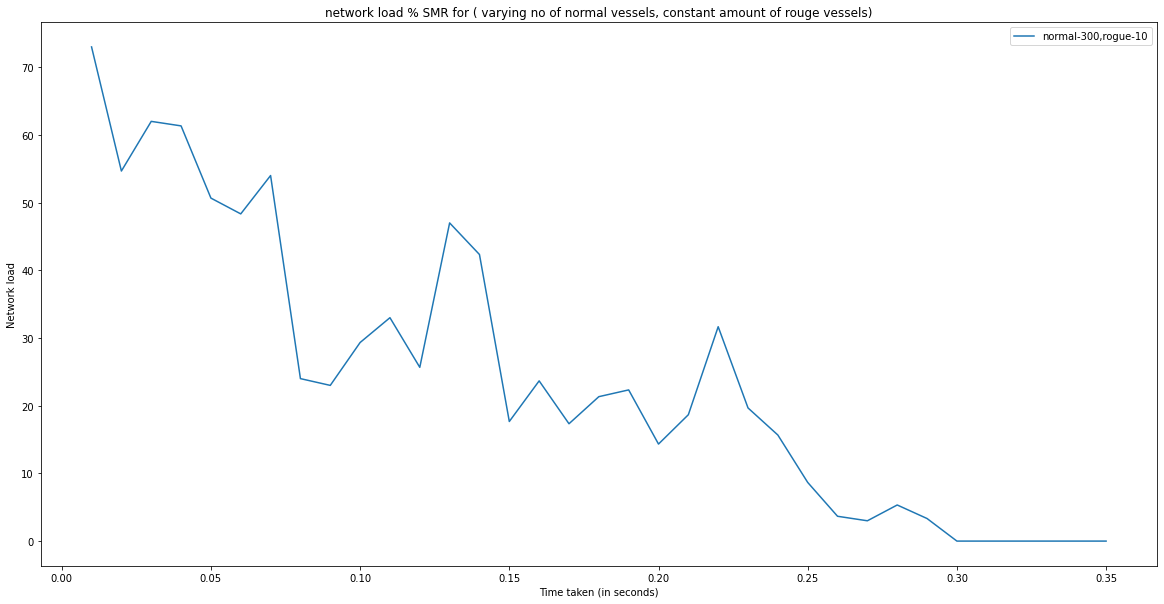

In [3]:
for i in range(df.shape[1]):
    df.iloc[:,i].plot(
        legend=True, 
        title='network load % SMR for ( varying no of normal vessels, constant amount of rouge vessels)', 
        xlabel='Time taken (in seconds)',
        ylabel='Network load',
    )

103    AxesSubplot(0.125,0.125;0.775x0.755)
66     AxesSubplot(0.125,0.125;0.775x0.755)
27     AxesSubplot(0.125,0.125;0.775x0.755)
53     AxesSubplot(0.125,0.125;0.775x0.755)
35     AxesSubplot(0.125,0.125;0.775x0.755)
105    AxesSubplot(0.125,0.125;0.775x0.755)
43     AxesSubplot(0.125,0.125;0.775x0.755)
12     AxesSubplot(0.125,0.125;0.775x0.755)
65     AxesSubplot(0.125,0.125;0.775x0.755)
40     AxesSubplot(0.125,0.125;0.775x0.755)
2      AxesSubplot(0.125,0.125;0.775x0.755)
28     AxesSubplot(0.125,0.125;0.775x0.755)
104    AxesSubplot(0.125,0.125;0.775x0.755)
14     AxesSubplot(0.125,0.125;0.775x0.755)
4      AxesSubplot(0.125,0.125;0.775x0.755)
29     AxesSubplot(0.125,0.125;0.775x0.755)
83     AxesSubplot(0.125,0.125;0.775x0.755)
48     AxesSubplot(0.125,0.125;0.775x0.755)
82     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

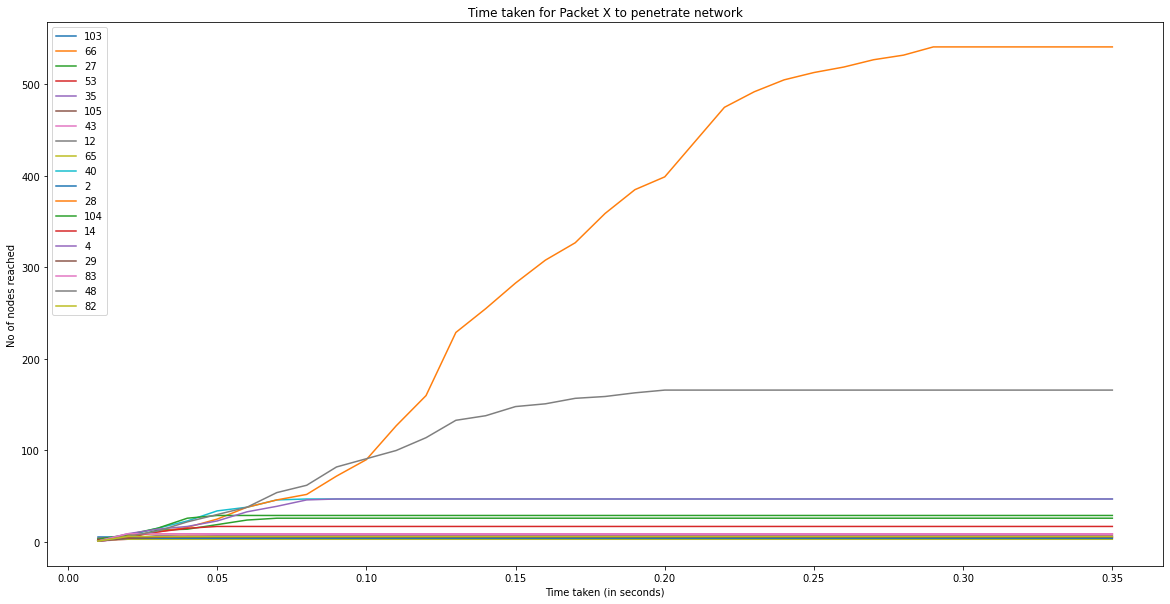

In [4]:
packet_df.T.fillna(0).apply(lambda x: x.cumsum().plot(
    legend=True,
    title='Time taken for Packet X to penetrate network',
    xlabel='Time taken (in seconds)',
    ylabel='No of nodes reached'
))

In [5]:
# from utils import visualise_mesh

# visualise_mesh(rplt,normal_vessels)